In [1]:
import pandas as pd
import xsim
import numpy as np
import pandas
import matplotlib.pyplot as plt

from lib.dynamics.manager import DroneManager

In [18]:
def simulate(manager, due, controller=None, show=False, log_interval=None):
    dt = manager.dt
    log = xsim.Logger()

    if controller is None:
        controller = lambda x: np.zeros((manager.num_drone, 2))

    for time in xsim.generate_step_time(due, dt):
        states = manager.states
        actions = controller(states)

        logdict_state = {f"state{i}": states[i] for i in range(manager.num_drone)}
        logdict_action = {f"action{i}": actions[i] for i in range(manager.num_drone)}
        log.store(time=time, **logdict_state, **logdict_action).flush()

        manager.step(actions)

    ix = manager.drones[0].ix
    ret = xsim.Retriever(log)
    res = dict(time=ret.time())
    res.update(
        **{f"x{i}": getattr(ret, f"state{i}")(ix.x) for i in range(manager.num_drone)},
        **{f"y{i}": getattr(ret, f"state{i}")(ix.y) for i in range(manager.num_drone)},
        **{f"u{i}": getattr(ret, f"state{i}")(ix.u) for i in range(manager.num_drone)},
        **{f"v{i}": getattr(ret, f"state{i}")(ix.v) for i in range(manager.num_drone)},
    )
    return pd.DataFrame(res)

In [24]:
def plot_trajectory(data, kind="line"):
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    for i in range(manager.num_drone):
        data.plot(x=f"x{i}", y=f"y{i}", ax=axes[0], kind=kind)
        data.plot(x=f"u{i}", y=f"v{i}", ax=axes[1], kind=kind)
    plt.show()

## ２Droneでの衝突シミュレーション
Test for simulation of collision of 2 drones

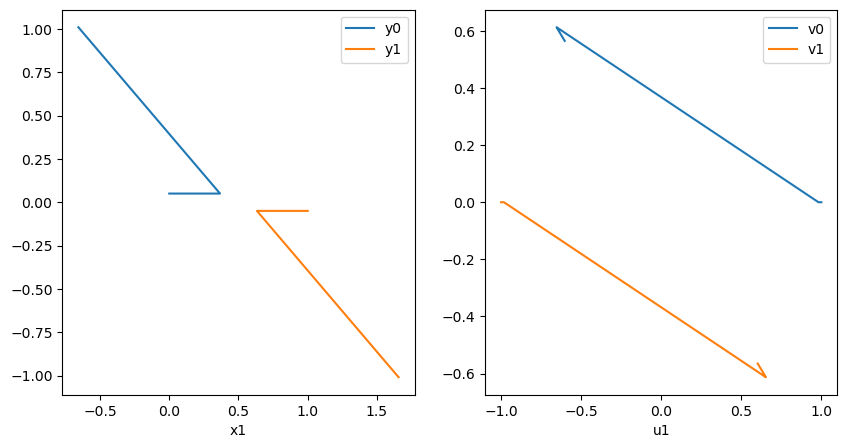

In [27]:
manager = DroneManager()
manager.create_drones(x=0., y= 0.05, u= 1.)
manager.create_drones(x=1., y=-0.05, u=-1.)

res = simulate(manager, 2)
plot_trajectory(res)